#### implement
1. sigmoid func.
2. x-vector graph x1/x2

In [130]:

import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
from ipywidgets import Output
from lab_utils_common import dlc, plot_data, sigmoid, draw_vthresh, compute_cost_logistic, plt_tumor_data
from plt_overfit import overfit_example, output

from plt_logistic_loss import plt_logistic_cost, plt_two_logistic_loss_curves, plt_simple_example, soup_bowl, plt_logistic_squared_error
from plt_one_addpt_onclick import plt_one_addpt_onclick
plt.style.use('./deeplearning.mplstyle')
np.set_printoptions(precision=8)

#### classification
1: True 0: False

In [91]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])
x_train2 = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train2 = np.array([0, 0, 0, 1, 1, 1])


In [92]:
pos = y_train == 1
neg = y_train == 0


x_train[pos]


array([3., 4., 5.])

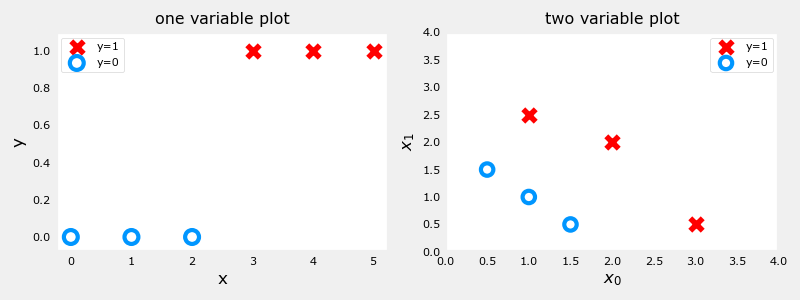

In [93]:

fig,ax = plt.subplots(1,2,figsize=(8,3))
#plot 1, single variable
ax[0].scatter(x_train[pos], y_train[pos], marker='x', s=80, c = 'red', label="y=1")
ax[0].scatter(x_train[neg], y_train[neg], marker='o', s=100, label="y=0", facecolors='none', 
              edgecolors=dlc["dlblue"],lw=3)

ax[0].set_ylim(-0.08,1.1)
ax[0].set_ylabel('y', fontsize=12)
ax[0].set_xlabel('x', fontsize=12)
ax[0].set_title('one variable plot')
ax[0].legend()

#plot 2, two variables
plot_data(X_train2, y_train2, ax[1])
ax[1].axis([0, 4, 0, 4])
ax[1].set_ylabel('$x_1$', fontsize=12)
ax[1].set_xlabel('$x_0$', fontsize=12)
ax[1].set_title('two variable plot')
ax[1].legend()
plt.tight_layout()
plt.show()

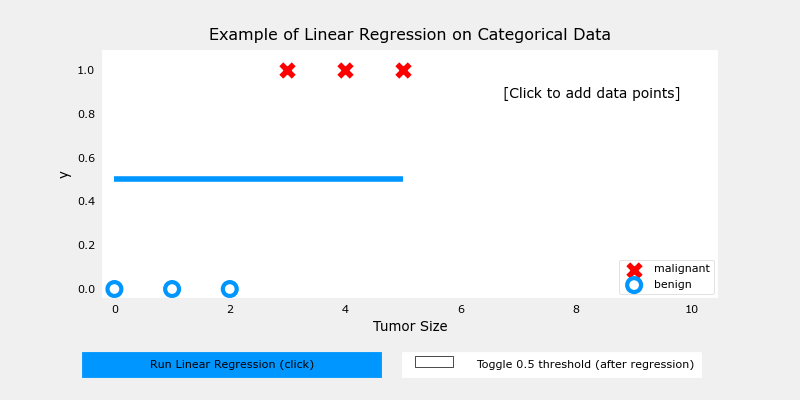

In [54]:
w_in = np.zeros((1))
b_in = 0
plt.close('all') 
addpt = plt_one_addpt_onclick( x_train,y_train, w_in, b_in, logistic=False)

#### logistic regression



$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) \tag{1} $$ 

  where

  $g(z) = \frac{1}{1+e^{-z}}\tag{2}$
  
  
$$\mathbf{w} \cdot \mathbf{x} = w_0 x_0 + w_1 x_1$$

In [95]:
input_array = np.array([1,2,3])
exp_array = np.exp(input_array)

exp_array

array([ 2.718,  7.389, 20.086])

In [96]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g = 1/(1+np.exp(-z))
   
    return g

In [97]:
z_tmp = np.arange(-10,11)
z_tmp

array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
         3,   4,   5,   6,   7,   8,   9,  10])

In [98]:

np.set_printoptions(precision=3) 
y = sigmoid(z_tmp)
print(np.c_[z_tmp,y])

[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


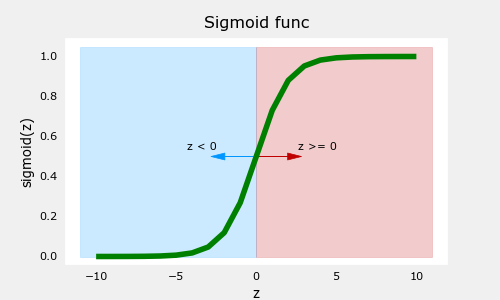

In [99]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp,y,c='g')


ax.set_title('Sigmoid func')
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

In [100]:
x_train = np.array([0,1,2,3,4,5])
y_train = np.array([0,0,0,1,1,1])
w_in = np.zeros(1)
b_in = 0 


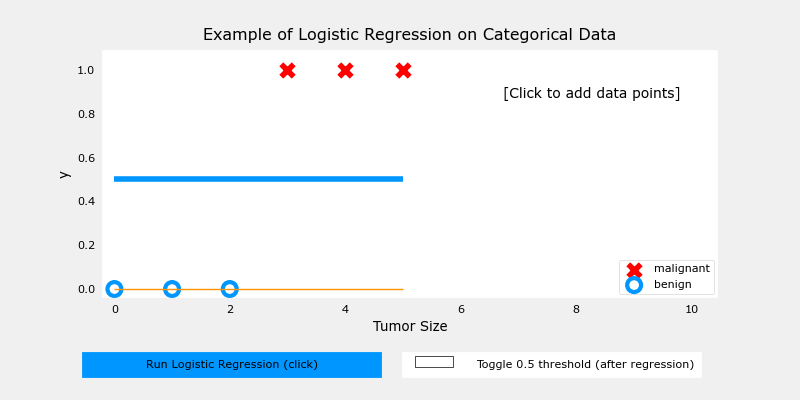

In [101]:
plt.close('all')
addpt = plt_one_addpt_onclick(x_train, y_train, w_in, b_in,logistic=True)

#### decision boundary

In [104]:
x = np.array([
    [0.5,1.5],
    [1,1],
    [1.5,0.5],
    [3,0.5],
    [2,2],
    [1,2.5]
])
    
y = np.array([0,0,0,1,1,1]).reshape(-1,1) #-1 = 淨低




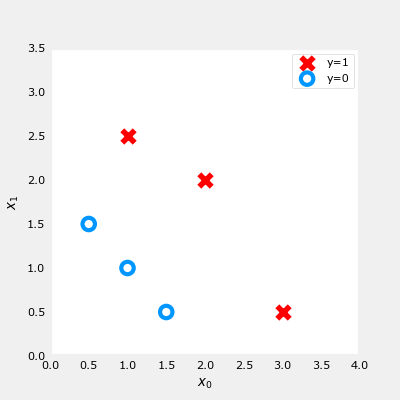

In [105]:
fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(x,y,ax)

ax.axis([0,4,0,3.5])
ax.set_ylabel('$x_1$')
ax.set_xlabel('$x_0$') 
plt.show()

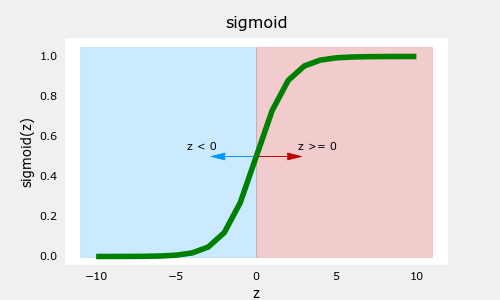

In [106]:
z = np.arange(-10,11)


fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z,sigmoid(z),c='g')


ax.set_title('sigmoid')
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')
draw_vthresh(ax,0)

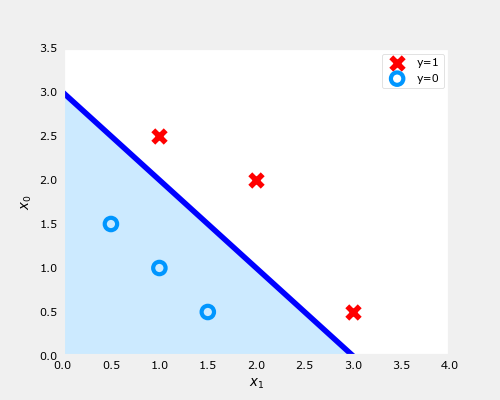

''

In [107]:
x0 = np.arange(0,6)

x1 = 3 - x0

fig,ax = plt.subplots(1,1,figsize=(5,4))
ax.plot(x0,x1,c='b')
ax.axis([0,4,0,3.5])

ax.fill_between(x0,x1,alpha=0.2)

plot_data(x,y,ax)
ax.set_ylabel('$x_0$')
ax.set_xlabel('$x_1$')
plt.show()


r''

#### loss func (single training set) & cost func (entire training set)

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 

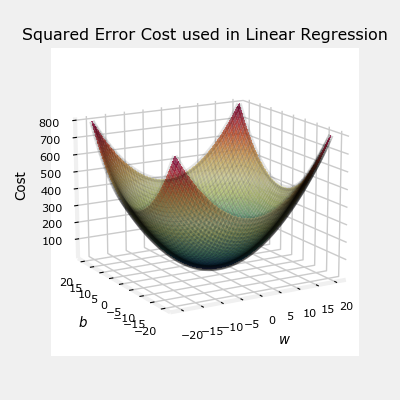

In [108]:
soup_bowl()

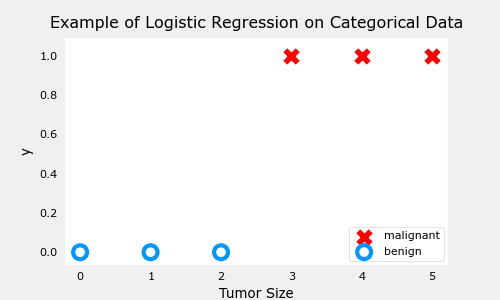

In [109]:
x_train = np.array([0,1,2,3,4,5], dtype=np.longdouble)
y_train = np.array([0,0,0,1,1,1], dtype=np.longdouble)
plt_simple_example(x_train,y_train)

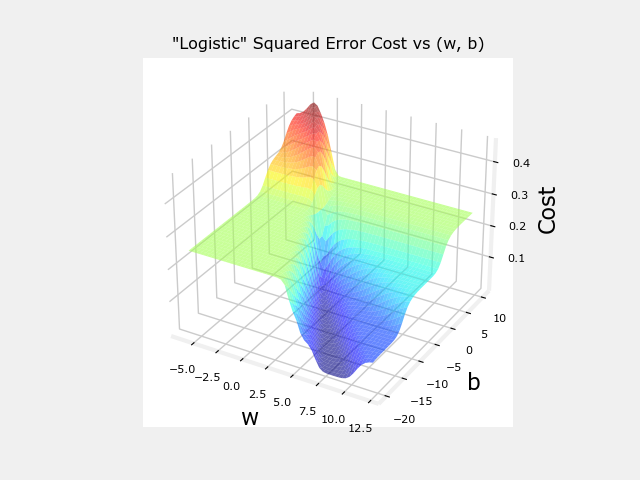

In [110]:
plt.close('all')
plt_logistic_squared_error(x_train,y_train)
plt.show()

\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}

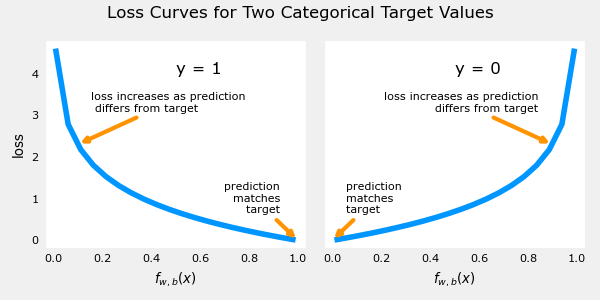

In [111]:
plt_two_logistic_loss_curves()

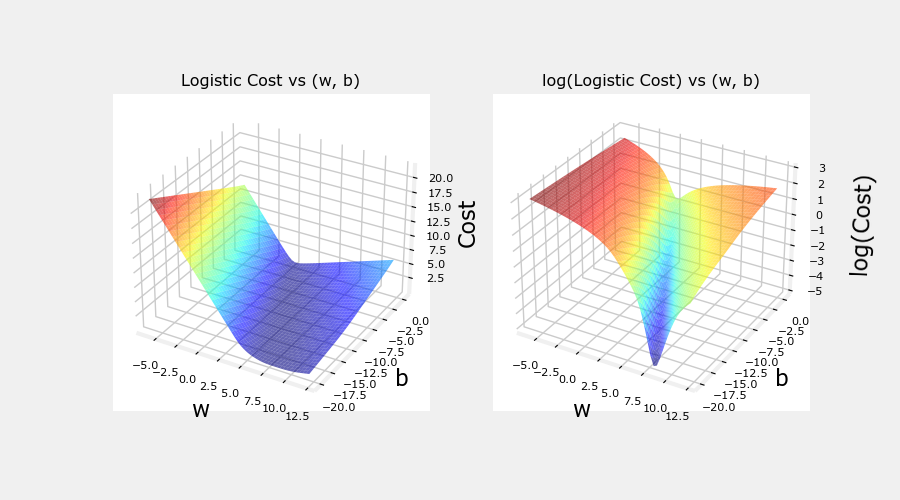

In [112]:
plt.close('all')
cst = plt_logistic_cost(x_train,y_train)

In [113]:
x_train = np.array([
    [0.5,1.5],
    [1,1],
    [1.5,0.5],
    [3,0.5],
    [2,2],
    [1,2.5]
]) #(m,n)
y_train = np.array([0,0,0,1,1,1]) #[m,]

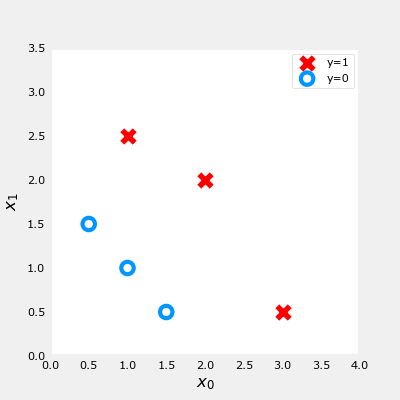

In [114]:
fig,ax = plt.subplots(1,1,figsize=(4,4))

plot_data(x_train, y_train, ax)

ax.axis([0,4,0,3.5]) #x: 0-4 , y: 0-3.5
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [115]:
def cost_logistics(x,y,w,b):
    '''
    Computes cost

    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    '''
    m = x.shape[0]
    cost = 0
    for i in range(m):
        z_i = np.dot(x[i],w) + b 
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    cost = cost/m
    return cost

In [116]:
w_tmp = np.array([1,1])
b_tmp = -3
print(cost_logistics(x_train,y_train, w_tmp, b_tmp))

0.36686678640551745


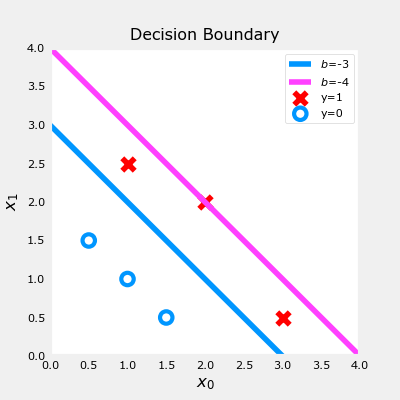

In [117]:
x0 = np.arange(0,6)
x1 = 3 -x0
x1_ = 4 - x0

fig,ax = plt.subplots(1,1,figsize=(4,4))

ax.plot(x0,x1,c=dlc['dlblue'], label = '$b$=-3')
ax.plot(x0,x1_,c=dlc['dlmagenta'], label = '$b$=-4')

plot_data(x_train,y_train,ax)
ax.axis([0,4,0,4])

ax.set_ylabel('$x_1$',fontsize=12)
ax.set_xlabel('$x_0$',fontsize=12)
plt.legend(loc='upper right')
plt.title('Decision Boundary')
plt.show()

In [77]:
w_array1 = np.array([1,1])
b_1 = -3
w_array2 = np.array([1,1])
b_2 = -4

print('Cost for b=-3:', cost_logistics(x_train,y_train,w_array1, b_1))
print('Cost for b=-4:', cost_logistics(x_train,y_train,w_array2, b_2))

Cost for b=-3: 0.36686678640551745
Cost for b=-4: 0.5036808636748461


#### Gradient descent

In [118]:
import copy, math
from plt_quad_logistic import plt_quad_logistic, plt_prob

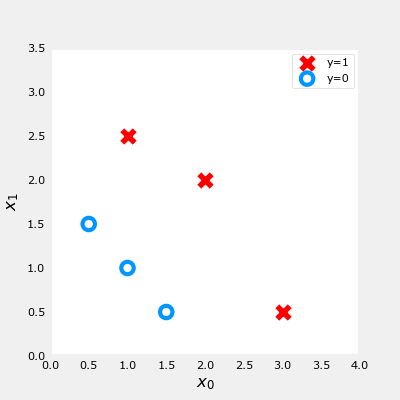

In [119]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

In [120]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [121]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


In [122]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
        
    return w, b, J_history         #return final w,b and J history for graphing


In [125]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


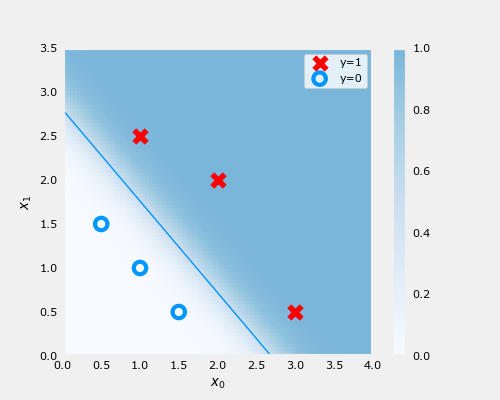

In [127]:
fig,ax = plt.subplots(1,1,figsize=(5,4))
# plot the probability 
plt_prob(ax, w_out, b_out)

# Plot the original data
ax.set_ylabel(r'$x_1$')
ax.set_xlabel(r'$x_0$')   
ax.axis([0, 4, 0, 3.5])
plot_data(X_train,y_train,ax)

# Plot the decision boundary
x0 = -b_out/w_out[0]
x1 = -b_out/w_out[1]
ax.plot([0,x0],[x1,0], c=dlc["dlblue"], lw=1)
plt.show()

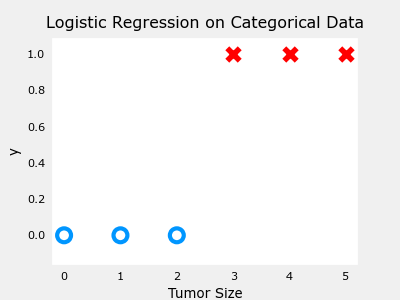

In [131]:
x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

fig,ax = plt.subplots(1,1,figsize=(4,3))
plt_tumor_data(x_train, y_train, ax)
plt.show()

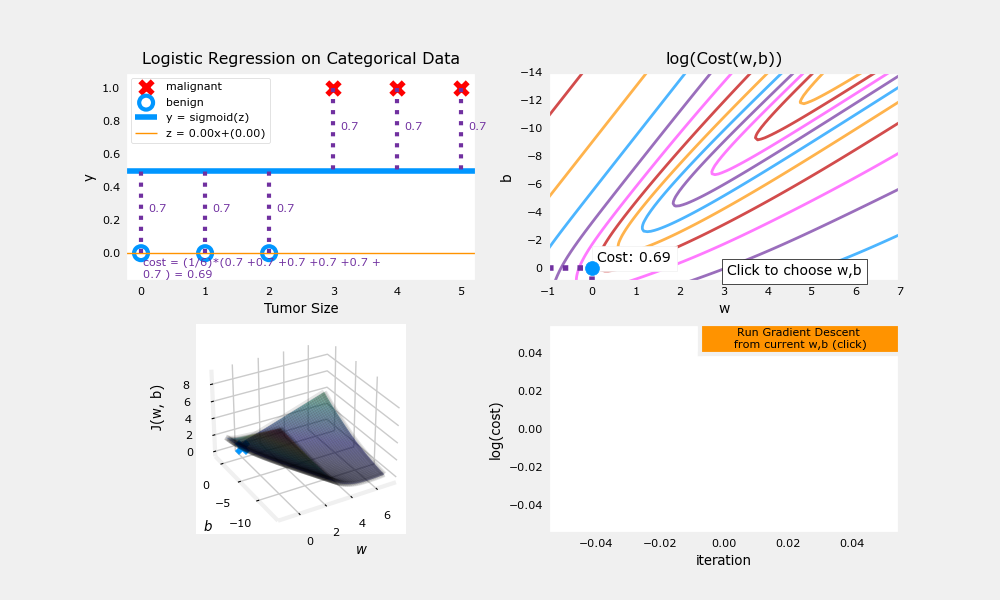

In [129]:
w_range = np.array([-1, 7])
b_range = np.array([1, -14])
quad = plt_quad_logistic( x_train, y_train, w_range, b_range )

#### scikit learn logistic regression

In [132]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [136]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [134]:
y_pred = lr_model.predict(X)

print("Prediction on training set:", y_pred)

Prediction on training set: [0 0 0 1 1 1]


In [135]:
print("Accuracy on training set:", lr_model.score(X, y))

Accuracy on training set: 1.0


#### Overfit

Output(outputs=({'name': 'stderr', 'text': "C:\\Users\\Chengkf\\anaconda3\\lib\\site-packages\\sklearn\\linear…

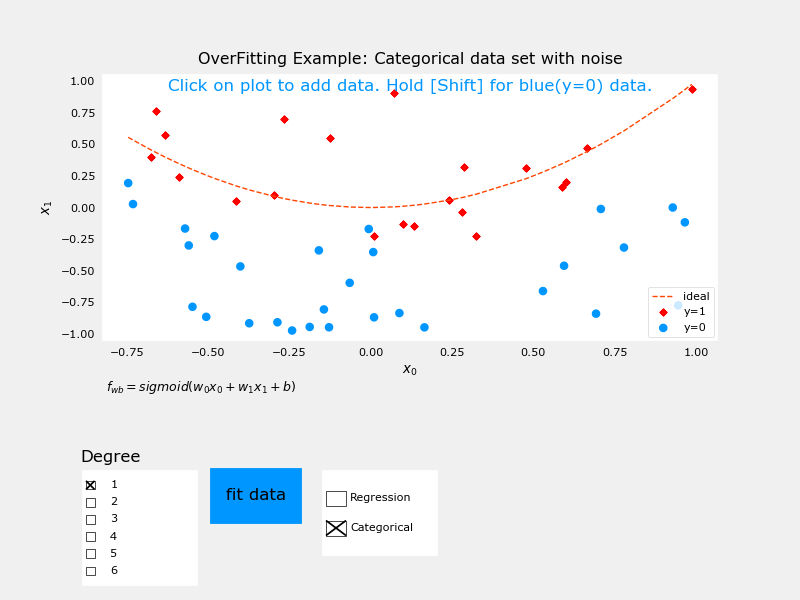

In [78]:
plt.close("all")
display(output)
ofit = overfit_example(False)

#### Regularization

**Expected Output**:
<table>
  <tr>
    <td> <b>Regularized cost: </b> 0.07917239320214275 </td>
  </tr>
</table>

In [79]:
def compute_cost_linear_reg(x,y,w,b,lambda_=1):
    """
    Computes the cost over all examples
    Args:
      x (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """
    
    m = x.shape[0]
    n = len(w)
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(x[i], w) + b                                   #(n,)(n,)=scalar, see np.dot
        cost = cost + (f_wb_i - y[i])**2                               #scalar             
    cost = cost / (2 * m)                                              #scalar  
 
    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [80]:
np.random.seed(1)
x_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(x_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_linear_reg(x_tmp,y_tmp,w_tmp,b_tmp,lambda_tmp)
print(f'Regularization: {cost_tmp}')

Regularization: 0.07917239320214275


In [81]:
def compute_cost_logistic_reg(x, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
    Args:
      x (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns:
      total_cost (scalar):  cost 
    """

    m,n  = x.shape
    cost = 0
    for i in range(m):
        z_i = np.dot(x[i], w) + b                                      #(n,)(n,)=scalar, see np.dot
        f_wb_i = sigmoid(z_i)                                          #scalar
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      #scalar
             
    cost = cost/m                                                      #scalar

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          #scalar
    reg_cost = (lambda_/(2*m)) * reg_cost                              #scalar
    
    total_cost = cost + reg_cost                                       #scalar
    return total_cost                                                  #scalar

In [82]:
np.random.seed(1)
x_tmp = np.random.rand(5,6)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(x_tmp.shape[1]).reshape(-1,)-0.5
b_tmp = 0.5
lambda_tmp = 0.7
cost_tmp = compute_cost_logistic_reg(x_tmp,y_tmp,w_tmp,b_tmp,lambda_tmp)
print(f'Regularization: {cost_tmp}')

Regularization: 0.6850849138741673


In [83]:
def compute_gradient_linear_reg(x, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = x.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(x[i], w) + b) - y[i]                 
        for j in range(n):                         
            dj_dw[j] = dj_dw[j] + err * x[i, j]               
        dj_db = dj_db + err                        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m   
    
    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw

In [84]:
np.random.seed(1)
x_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(x_tmp.shape[1])
b_tmp = 0.5 
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp = compute_gradient_linear_reg(x_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f'dj_db: {dj_db_tmp}',)
print(f'Regularized dj_dw:\n {dj_dw_tmp.tolist()}',)

dj_db: 0.6648774569425726
Regularized dj_dw:
 [0.29653214748822276, 0.4911679625918033, 0.21645877535865857]


In [85]:
def compute_gradient_logistic_reg(x, y, w, b, lambda_): 
    """
    Computes the gradient for linear regression 
 
    Args:
      x (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
      lambda_ (scalar): Controls amount of regularization
    Returns
      dj_dw (ndarray Shape (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)            : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = x.shape
    dj_dw = np.zeros((n,))                            #(n,)
    dj_db = 0.0                                       #scalar

    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw  

In [86]:
np.random.seed(1)
x_tmp = np.random.rand(5,3)
y_tmp = np.array([0,1,0,1,0])
w_tmp = np.random.rand(x_tmp.shape[1])
b_tmp = 0.5
lambda_tmp = 0.7
dj_db_tmp, dj_dw_tmp =  compute_gradient_logistic_reg(x_tmp, y_tmp, w_tmp, b_tmp, lambda_tmp)

print(f"dj_db: {dj_db_tmp}", )
print(f"Regularized dj_dw:\n {dj_dw_tmp.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]


Output(outputs=({'name': 'stderr', 'text': "C:\\Users\\Chengkf\\anaconda3\\lib\\site-packages\\sklearn\\linear…

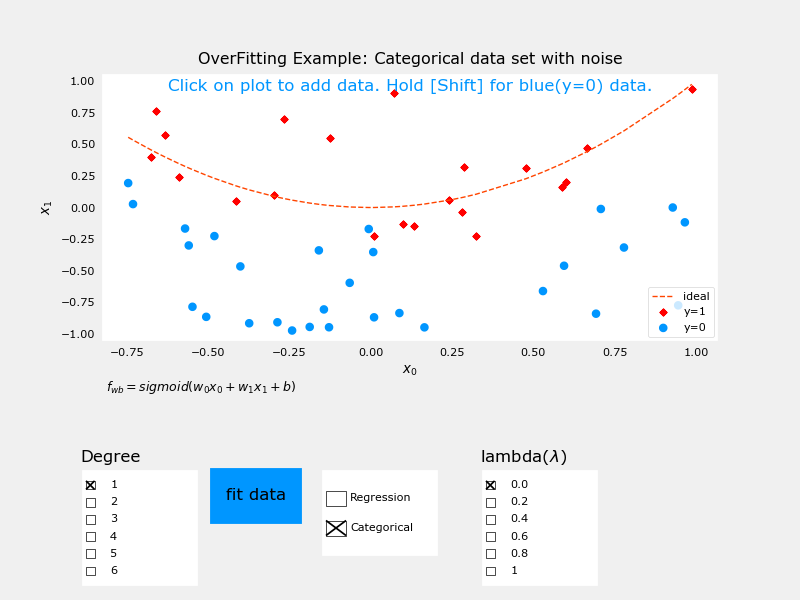

In [87]:
plt.close('all')
display(output)
ofit = overfit_example(True)